In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
price_med=pd.read_csv('/content/NY-House-Dataset.csv')
price_med

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [ ]:
missing=price_med.isnull().sum()
missing

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


In [75]:
addr =price_med.drop(columns=['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
                   'ADMINISTRATIVE_AREA_LEVEL_2',
                   'LOCALITY', 'SUBLOCALITY',
                   'STREET_NAME', 'LONG_NAME',
                   'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'])
addr

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT
0,Condo for sale,315000,2,2.000000,1400.000000
1,Condo for sale,195000000,7,10.000000,17545.000000
2,House for sale,260000,4,2.000000,2015.000000
3,Condo for sale,69000,3,1.000000,445.000000
4,Townhouse for sale,55000000,7,2.373861,14175.000000
...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862
4797,Co-op for sale,245000,1,1.000000,2184.207862
4798,Co-op for sale,1275000,1,1.000000,2184.207862
4799,Condo for sale,598125,2,1.000000,655.000000


In [76]:
categorical_cols = ['TYPE']
numerical_cols = ['BEDS', 'BATH', 'PROPERTYSQFT']
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(addr[categorical_cols])

# Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=addr.index)

# Combine numerical data and encoded categorical data
X = pd.concat([addr[numerical_cols], df_encoded], axis=1)
y = addr['PRICE']
df_encoded

,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Mobile house for sale,TYPE_Multi-family home for sale,TYPE_Pending,TYPE_Townhouse for sale
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.01
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.00      0.00      0.00         1
      119888       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         2
      130000       0.00      0.00      0.00         1
      140000       0.00      0.00      0.00         2
      149000       0.00      0.00      0.00         2
      149999       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [79]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
596,750000,2500000
4507,899000,799000
3049,5900000,2500000
2957,1695000,799000
8,265000,299000
...,...,...
2669,749000,595000
3094,1400000,799000
2658,999000,799000
2809,925000,799000


In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.01
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.00      0.00      0.00         1
      119888       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         2
      130000       0.00      0.00      0.00         1
      140000       0.00      0.00      0.00         2
      149000       0.00      0.00      0.00         2
      149999       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
#Apply random forest model
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
#make predictions
y_pred = random_forest.predict(X_test)

In [82]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
3,LATITUDE,0.303194
4,LONGITUDE,0.302679
2,PROPERTYSQFT,0.206223
0,BEDS,0.077733
1,BATH,0.054918
6,TYPE_Condo for sale,0.012553
11,TYPE_House for sale,0.009492
15,TYPE_Pending,0.009227
14,TYPE_Multi-family home for sale,0.007099
16,TYPE_Townhouse for sale,0.007017


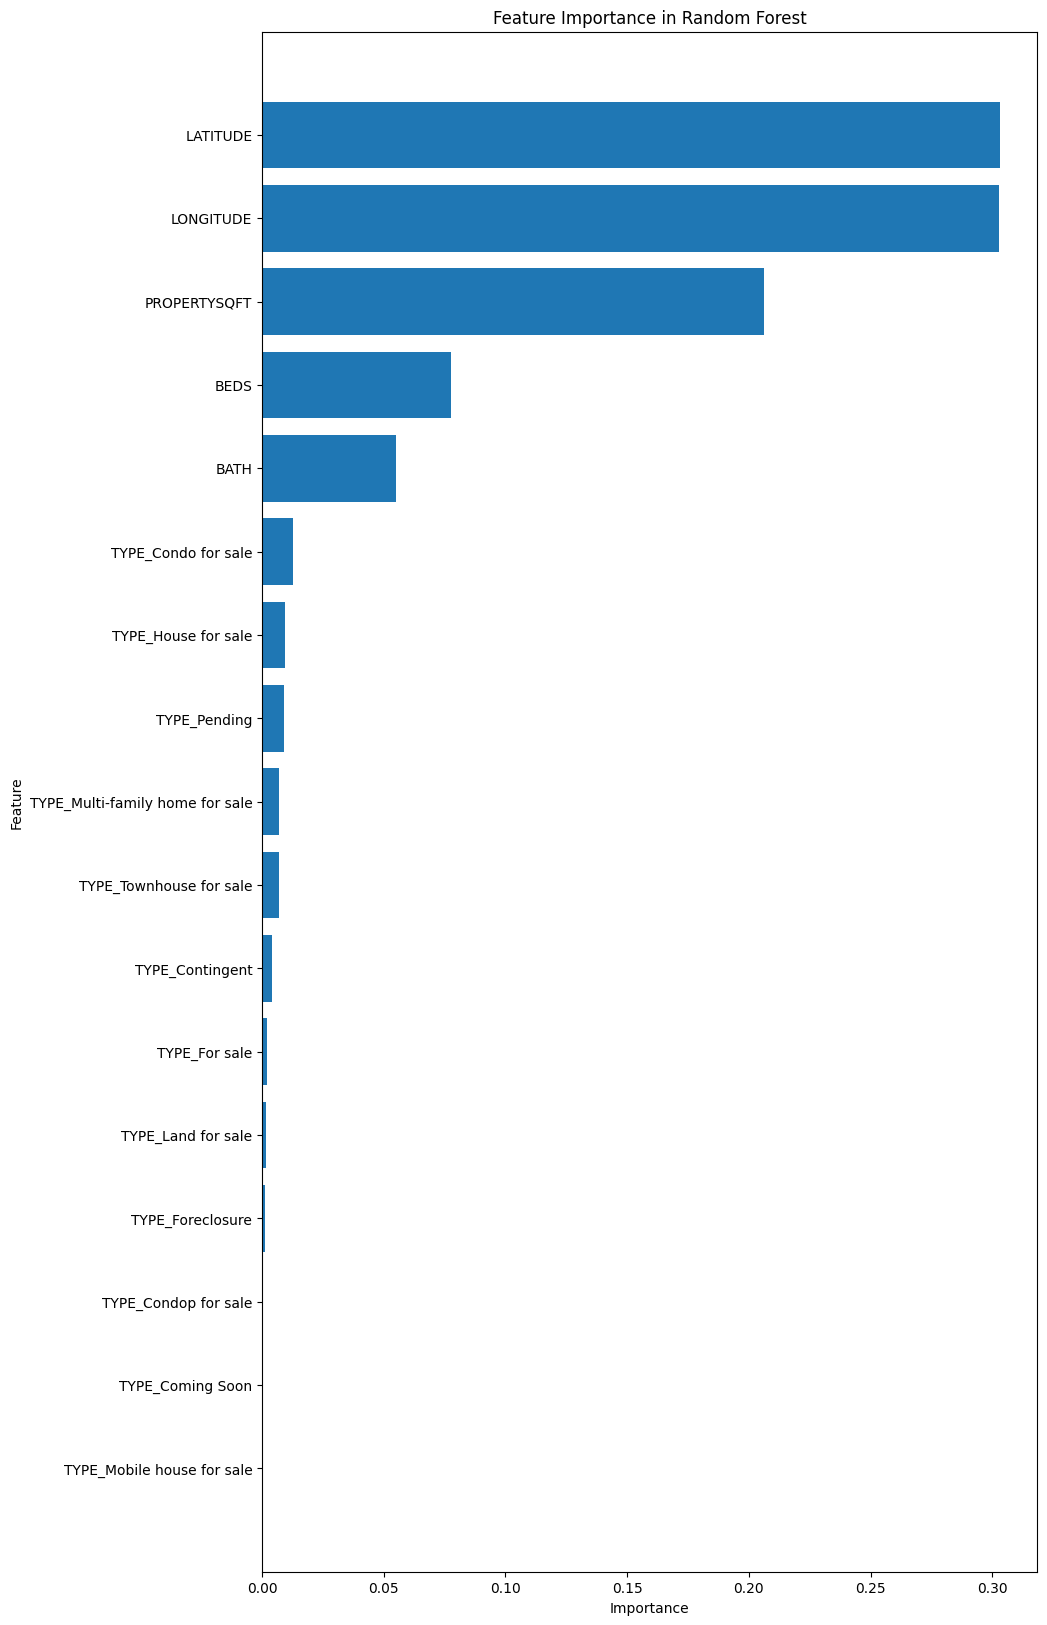

In [83]:
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.09
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         0
       97500       0.00      0.00      0.00         0
       99000       0.75      0.75      0.75         4
      100000       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         0
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.50      1.00      0.67         1
      119888       0.00      0.00      0.00         1
      120000       0.00      0.00      0.00         0
      125000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [86]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages (trees)
    learning_rate=0.05,   # Step size for updating weights (lower values make learning slower)
    max_depth=5,         # Maximum depth of individual trees
    random_state=42
)

# Fit the model on the training data
gbm.fit(X_train, y_train)
# Predict on the testing set
y_pred = gbm.predict(x_test)

KeyboardInterrupt: 

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.09
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         0
       97500       0.00      0.00      0.00         0
       99000       0.75      0.75      0.75         4
      100000       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         0
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.50      1.00      0.67         1
      119888       0.00      0.00      0.00         1
      120000       0.00      0.00      0.00         0
      125000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [90]:

# Define categorical and numerical columns
categorical_cols = ['TYPE']
numerical_cols = ['BEDS', 'BATH', 'PROPERTYSQFT']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(addr[categorical_cols])

# Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=addr.index)

# Combine numerical data and encoded categorical data
X = pd.concat([addr[numerical_cols], df_encoded], axis=1)
y = addr['PRICE']

# Scale the features for better performance of k-NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
#Apply PCA to the scales data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()

,Principal Component 1,Principal Component 2
0,-1.153459,-1.382793
1,5.028528,-1.478213
2,-0.056413,1.953260
3,-1.387049,-1.363270
4,3.535227,-0.245053


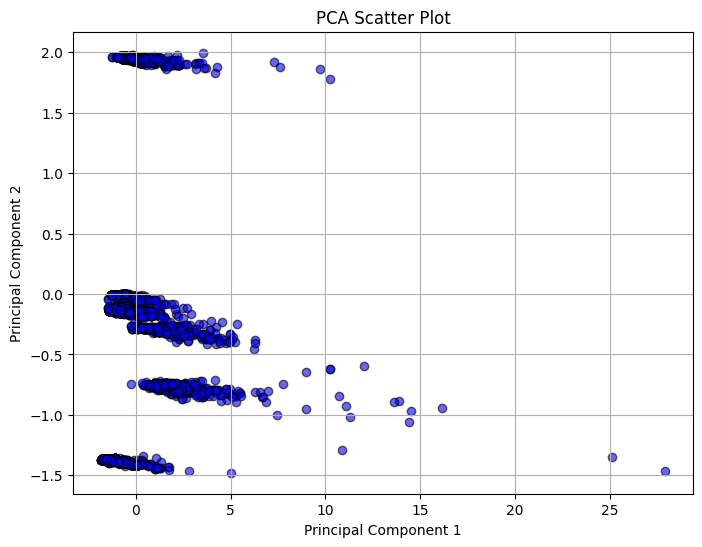

In [92]:

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [93]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
#set k values initially to 5
k = 5
#apply define model
knn_model = KNeighborsClassifier(n_neighbors=k)
#apply to the trainig data
knn_model.fit(X_train, y_train)
#make predictions using the test data
y_pred = knn_model.predict(X_test)

In [94]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.01
Classification Report:
               precision    recall  f1-score   support

        2494       0.00      0.00      0.00         0
        3225       0.00      0.00      0.00         0
        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         0
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         0
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.00      0.00      0.00         1
      119888       0.00      0.00      0.00         1
      120000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [95]:

# Test different values of k and calculate the average accuracy
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best k value: 1


In [96]:

k = 19
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.01
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         0
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         0
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      105509       0.00      0.00      0.00         0
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.00      0.00      0.00         1
      119888       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         2
      129000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_